In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Charger les données
num_words = 10000  # On utilise les 10 000 mots les plus fréquents
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Nous allons aussi convertir les séquences de longueur variable en matrices de taille fixe
maxlen = 500  # Longueur maximale des séquences
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:

# Diviser l'ensemble d'entraînement en ensemble d'entraînement et ensemble de validation
X_val = X_train[:10000]
y_val = y_train[:10000]
X_train = X_train[10000:]
y_train = y_train[10000:]



In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

model = Sequential()

# Ajouter une couche d'entrée (ce sont les données prétraitées)
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))

# Ajouter une couche cachée
model.add(Dense(128, activation='relu'))

# Ajouter la couche de sortie
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [8]:
history = model.fit(
    X_train, y_train,
    epochs=20, batch_size=512,
    validation_data=(X_val, y_val)
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.4991 - loss: 302.0670 - val_accuracy: 0.5008 - val_loss: 80.2520
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5508 - loss: 64.2510 - val_accuracy: 0.5065 - val_loss: 58.1720
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6000 - loss: 36.6518 - val_accuracy: 0.5057 - val_loss: 45.9359
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6677 - loss: 20.1808 - val_accuracy: 0.5051 - val_loss: 42.1865
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7195 - loss: 13.2560 - val_accuracy: 0.5032 - val_loss: 49.5534
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7418 - loss: 10.8641 - val_accuracy: 0.5017 - val_loss: 43.6330
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8038 - loss: 6.6381 - val_accuracy: 0.5093 - val_loss: 36.3174
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8359 - loss: 4.4795 - val_accura

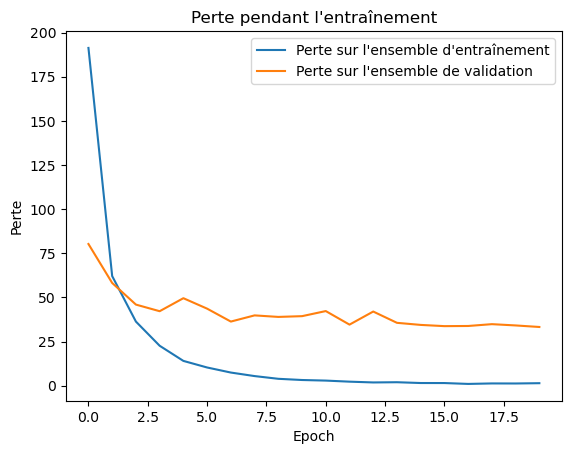

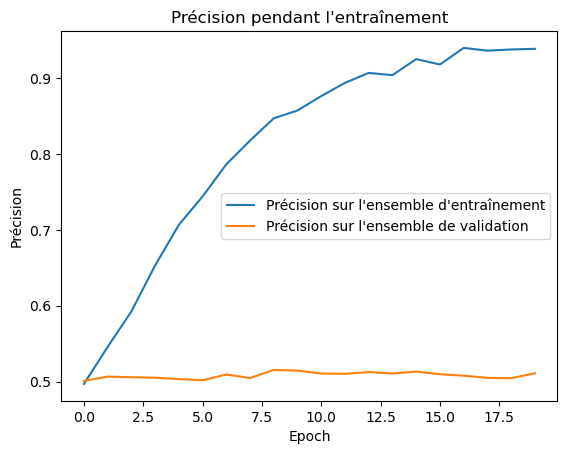

In [9]:
import matplotlib.pyplot as plt

# Visualiser la courbe de la perte
plt.plot(history.history['loss'], label='Perte sur l\'ensemble d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte sur l\'ensemble de validation')
plt.title('Perte pendant l\'entraînement')
plt.xlabel('Epoch')
plt.ylabel('Perte')
plt.legend()
plt.show()

# Visualiser la courbe de la précision
plt.plot(history.history['accuracy'], label='Précision sur l\'ensemble d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision sur l\'ensemble de validation')
plt.title('Précision pendant l\'entraînement')
plt.xlabel('Epoch')
plt.ylabel('Précision')
plt.legend()
plt.show()


In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Perte sur l'ensemble de test: {test_loss:.4f}")
print(f"Précision sur l'ensemble de test: {test_acc:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4953 - loss: 33.5492
Perte sur l'ensemble de test: 33.1532
Précision sur l'ensemble de test: 0.4970
